<a href="https://colab.research.google.com/github/aadhityamenon/general-project-fall25/blob/aadhityamenonpneumo/AadhityaMenonEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files: /kaggle/input/chest-xray-pneumonia
Searching for data root...
       NORMAL  PNEUMONIA  Total
train    1342       3876   5218
test      234        390    624
val         9          9     18
       NORMAL  PNEUMONIA  Total
train   False      False  False
test    False      False  False
val     False      False  False


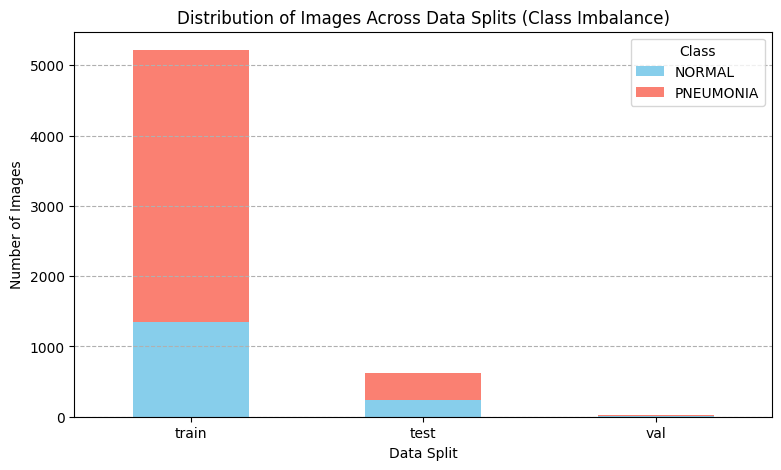

In [10]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)


def find_data_root(base_path): #solution to my issues with loading the path
    print("Searching for data root...")
    for root, dirs, files in os.walk(base_path):
        if 'train' in dirs and 'test' in dirs and 'val' in dirs:
            return root
    return None

path = find_data_root(path)
path = os.path.join(path, 'chest_xray')

def count_images(data_path):  #counts how many normal images and pneumonia images there are
  try:
    normal_count = len(os.listdir(os.path.join(data_path,'NORMAL')))
    pneum_count = len(os.listdir(os.path.join(data_path, 'PNEUMONIA')))
    return normal_count, pneum_count
  except FileNotFoundError:
    return 0,0

data = {}
for split in ['train','test','val']:
  normal_count, pneum_count = count_images(os.path.join(path,split))
  data[split] = [normal_count,pneum_count]

df = pd.DataFrame(data, index=['NORMAL','PNEUMONIA']).T
df['Total'] = df.sum(axis=1)
print(df.head())
print(df.isnull())

df[['NORMAL', 'PNEUMONIA']].plot(
    kind='bar',
    stacked=True,
    figsize=(9, 5),
    color=['skyblue', 'salmon']
)
plt.title('Distribution of Images Across Data Splits (Class Imbalance)')
plt.ylabel('Number of Images')
plt.xlabel('Data Split')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.grid(axis='y', linestyle='--')
plt.show()

